In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rf import return_portfolios, optimal_portfolio
import numpy as np

         Date  General Electric  Chesapeake Energy   AT&T  Cisco Systems  \
0  2007-12-31             37.08              39.36  42.12          27.25   
1  2008-03-31             36.63              45.76  37.71          24.08   
2  2008-06-30             26.35              66.77  32.75          23.47   
3  2008-09-30             23.87              33.29  28.35          22.25   
4  2008-12-31             15.82              15.34  28.19          16.18   

   Campbell Soup  
0          35.77  
1          33.91  
2          33.03  
3          38.30  
4          29.49  
    General Electric  Chesapeake Energy      AT&T  Cisco Systems  \
0                NaN                NaN       NaN            NaN   
1          -0.012136           0.162602 -0.104701      -0.116330   
2          -0.280644           0.459135 -0.131530      -0.025332   
3          -0.094118          -0.501423 -0.134351      -0.051981   
4          -0.337243          -0.539201 -0.005644      -0.272809   
5          -0.347029 

C:\Users\gsg18\Downloads\dev\python\python_finance\codec\rf.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  returns = np.transpose(returns.as_matrix())


     pcost       dcost       gap    pres   dres
 0:  2.3517e-03 -1.0183e+00  1e+00  8e-17  3e+00
 1:  1.8118e-03 -2.8254e-02  3e-02  6e-17  8e-02
 2: -1.4950e-02 -1.9458e-02  5e-03  2e-16  2e-17
 3: -1.7780e-02 -1.7871e-02  9e-05  2e-16  9e-18
 4: -1.7834e-02 -1.7835e-02  9e-07  1e-16  9e-18
 5: -1.7835e-02 -1.7835e-02  9e-09  1e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3950e-03 -1.0182e+00  1e+00  6e-17  3e+00
 1:  1.8529e-03 -2.8227e-02  3e-02  1e-16  8e-02
 2: -1.4853e-02 -1.9394e-02  5e-03  1e-16  2e-17
 3: -1.7699e-02 -1.7791e-02  9e-05  1e-16  1e-17
 4: -1.7756e-02 -1.7757e-02  9e-07  2e-16  1e-17
 5: -1.7756e-02 -1.7756e-02  9e-09  1e-16  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4435e-03 -1.0182e+00  1e+00  3e-17  3e+00
 1:  1.8989e-03 -2.8196e-02  3e-02  8e-17  8e-02
 2: -1.4745e-02 -1.9323e-02  5e-03  1e-16  2e-17
 3: -1.7609e-02 -1.7701e-02  9e-05  1e-16  2e-17
 4: -1.7667e-02 -1.7668e

 2:  3.4308e-01  2.7235e-01  7e-02  2e-16  5e-16
 3:  3.2503e-01  3.2089e-01  4e-03  3e-17  9e-17
 4:  3.2367e-01  3.2342e-01  2e-04  1e-16  2e-16
 5:  3.2364e-01  3.2364e-01  6e-06  1e-16  1e-16
 6:  3.2364e-01  3.2364e-01  6e-08  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.5026e-01 -7.2595e-01  8e+00  2e+00  3e+00
 1:  4.1989e-01 -3.2462e-01  7e-01  2e-16  5e-16
 2:  3.8082e-01  3.1375e-01  7e-02  1e-16  4e-16
 3:  3.6488e-01  3.6119e-01  4e-03  1e-16  5e-16
 4:  3.6381e-01  3.6359e-01  2e-04  6e-17  2e-16
 5:  3.6379e-01  3.6378e-01  4e-06  1e-16  1e-16
 6:  3.6379e-01  3.6379e-01  4e-08  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8810e-01 -6.8789e-01  8e+00  2e+00  3e+00
 1:  4.6053e-01 -2.7873e-01  7e-01  5e-16  3e-16
 2:  4.2322e-01  3.6036e-01  6e-02  8e-17  4e-16
 3:  4.0964e-01  4.0639e-01  3e-03  8e-17  2e-16
 4:  4.0884e-01  4.0866e-01  2e-04  1e-16  2e-16
 5:  4.0883e-01  4.0882

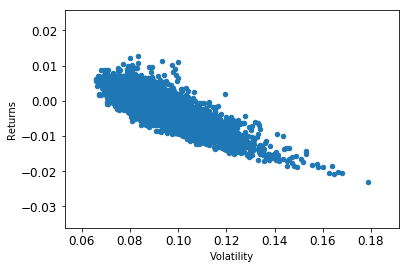

In [2]:
# 1. Load the stock data
stock_data = pd.read_csv('project_7_csv/stock_data_weak.csv')
print(stock_data.head())

# 2. Find the quarterly return for each period
selected=list(stock_data.columns[1:])
returns_quarterly = stock_data[selected].pct_change()
print(returns_quarterly)
# 3. Find the expected returns 
expected_returns = returns_quarterly.mean()
print(expected_returns)
# 4. Find the covariance 
cov_quarterly = returns_quarterly.cov()

# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly)

# 6. Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# 7. Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

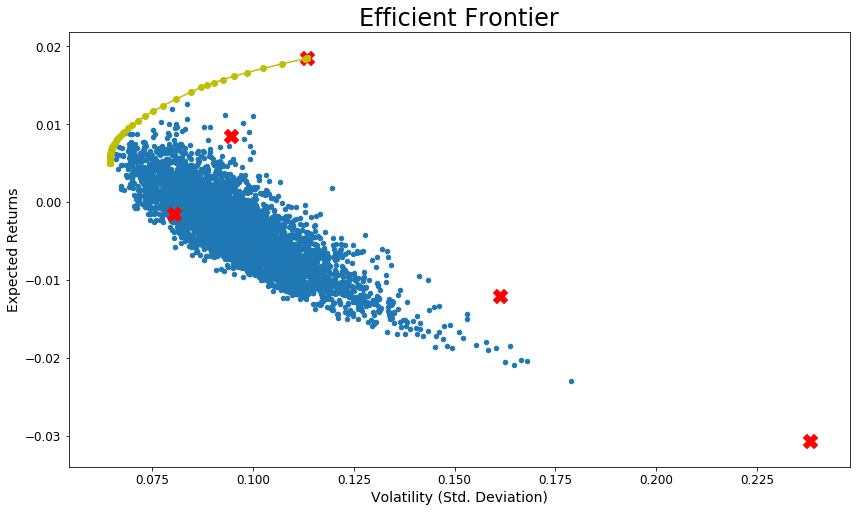

In [3]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(14,8))
# 8. Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

# Compare the set of portfolios on the EF to the 
try:
    single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
    plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
except:
    pass
plt.show()


In [4]:
# 10. Change the path variable
path = 'project_7_csv/stock_data2.csv'

# Load the stock data
stock_data = pd.read_csv(path)

# Find the quarterly for each period
selected=list(stock_data.columns[1:])
returns_quarterly = stock_data[selected].pct_change()

# Find the expected returns 
expected_returns = returns_quarterly.mean()

# Find the covariance 
cov_quarterly = returns_quarterly.cov()

# Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

# Plot the set of random portfolios
# random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

     pcost       dcost       gap    pres   dres
 0: -1.0662e-02 -1.0359e+00  1e+00  0e+00  3e+00
 1: -1.1534e-02 -4.5915e-02  3e-02  1e-16  1e-01
 2: -3.2498e-02 -3.8737e-02  6e-03  2e-16  2e-03
 3: -3.4247e-02 -3.4697e-02  4e-04  1e-16  1e-04
 4: -3.4442e-02 -3.4469e-02  3e-05  1e-16  5e-07
 5: -3.4446e-02 -3.4446e-02  4e-07  1e-16  5e-09
 6: -3.4446e-02 -3.4446e-02  4e-09  1e-16  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0582e-02 -1.0358e+00  1e+00  2e-16  3e+00
 1: -1.1451e-02 -4.5792e-02  3e-02  1e-16  1e-01
 2: -3.2227e-02 -3.8492e-02  6e-03  2e-16  2e-03
 3: -3.4012e-02 -3.4437e-02  4e-04  2e-16  8e-05
 4: -3.4193e-02 -3.4213e-02  2e-05  1e-16  7e-07
 5: -3.4196e-02 -3.4196e-02  2e-07  2e-16  7e-09
 6: -3.4196e-02 -3.4196e-02  2e-09  2e-16  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0492e-02 -1.0357e+00  1e+00  0e+00  3e+00
 1: -1.1358e-02 -4.5653e-02  3e-02  9e-17  1e-01
 2: -3.1924e-02 -3.8217e

 6:  5.7965e-01  5.7965e-01  3e-08  1e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.6944e-01 -4.7466e-01  1e+01  3e+00  4e+00
 1:  6.7295e-01 -3.9170e-02  9e-01  7e-02  9e-02
 2:  6.6866e-01  5.9211e-01  8e-02  5e-03  6e-03
 3:  6.5296e-01  6.4777e-01  5e-03  1e-04  2e-04
 4:  6.5111e-01  6.5089e-01  2e-04  1e-06  1e-06
 5:  6.5102e-01  6.5101e-01  2e-06  1e-08  1e-08
 6:  6.5101e-01  6.5101e-01  2e-08  1e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.3218e-01 -4.0745e-01  1e+01  3e+00  4e+00
 1:  7.3760e-01  4.1279e-02  9e-01  7e-02  1e-01
 2:  7.4545e-01  6.7232e-01  8e-02  4e-03  6e-03
 3:  7.3271e-01  7.2794e-01  5e-03  1e-04  2e-04
 4:  7.3116e-01  7.3096e-01  2e-04  1e-06  1e-06
 5:  7.3108e-01  7.3108e-01  2e-06  1e-08  1e-08
 6:  7.3108e-01  7.3108e-01  2e-08  1e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0273e-01 -3.3239e-01  1e+01  3e+00  4e+00


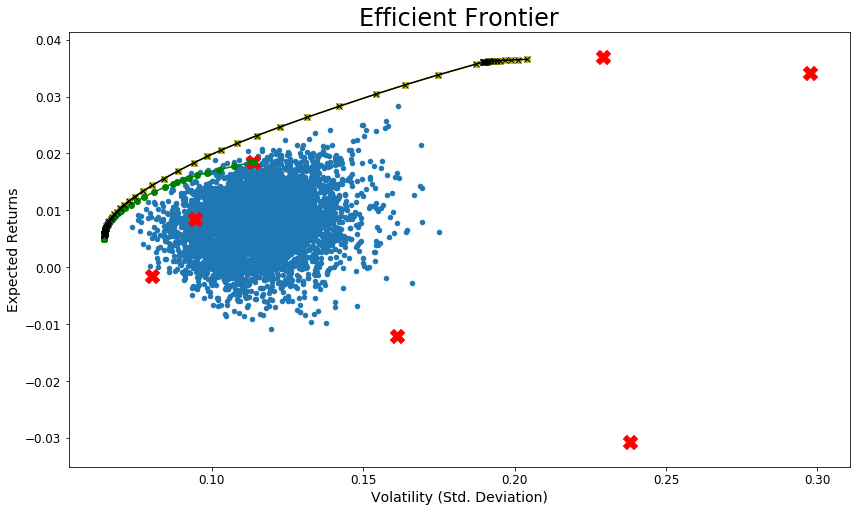

In [5]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(14,8))
# Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)


# Compare the set of portfolios on the EF to the 
single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)


# 11 & 12. Compare to original
weak_EF = pd.read_csv('project_7_csv/weak_risks_returns.csv')
plt.plot(weak_EF['Risks'], weak_EF['Returns'], 'g-o')

strong_EF = pd.read_csv('project_7_csv/strong_risks_returns.csv')
plt.plot(strong_EF['Risks'], strong_EF['Returns'], 'k-x')


plt.show()

PFE    0.015530
TGT    0.014783
M      0.021962
VZ     0.004856
JPM    0.034781
MRO   -0.008010
KO    -0.002050
PG     0.004132
CVS    0.016124
HPQ   -0.000237
dtype: float64
          PFE       TGT         M        VZ       JPM       MRO        KO  \
PFE  0.010005  0.001738  0.005978  0.004071  0.007016  0.009721  0.002086   
TGT  0.001738  0.012874  0.015762  0.002188  0.007805  0.002239  0.002534   
M    0.005978  0.015762  0.038909  0.002804  0.016439  0.015110  0.005189   
VZ   0.004071  0.002188  0.002804  0.006958 -0.000407  0.005276  0.002586   
JPM  0.007016  0.007805  0.016439 -0.000407  0.023837  0.013848  0.002979   
MRO  0.009721  0.002239  0.015110  0.005276  0.013848  0.043166 -0.001516   
KO   0.002086  0.002534  0.005189  0.002586  0.002979 -0.001516  0.011021   
PG   0.004297  0.003148  0.005853  0.002094  0.006364  0.002834  0.001255   
CVS  0.004300  0.005384  0.012501  0.002052  0.005041  0.003689  0.003223   
HPQ  0.006996  0.007774  0.018937  0.003076  0.011523  

 3:  9.0075e-01  8.9681e-01  4e-03  9e-05  1e-04
 4:  9.0046e-01  9.0040e-01  6e-05  9e-07  1e-06
 5:  9.0046e-01  9.0046e-01  6e-07  9e-09  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.8649e-01 -1.7923e-01  8e+00  3e+00  3e+00
 1:  9.3785e-01  2.7088e-01  1e+00  2e-01  3e-01
 2:  1.0170e+00  9.0531e-01  1e-01  7e-03  9e-03
 3:  1.0121e+00  1.0080e+00  4e-03  9e-05  1e-04
 4:  1.0118e+00  1.0117e+00  6e-05  9e-07  1e-06
 5:  1.0118e+00  1.0118e+00  6e-07  9e-09  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.9381e-01 -7.0220e-02  8e+00  3e+00  3e+00
 1:  1.0425e+00  3.8556e-01  1e+00  2e-01  3e-01
 2:  1.1447e+00  1.0234e+00  1e-01  5e-03  6e-03
 3:  1.1371e+00  1.1328e+00  4e-03  7e-05  9e-05
 4:  1.1367e+00  1.1366e+00  6e-05  7e-07  9e-07
 5:  1.1367e+00  1.1367e+00  6e-07  7e-09  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1144e+00  5.1976e-02  8e+00  3e+00  3e+00


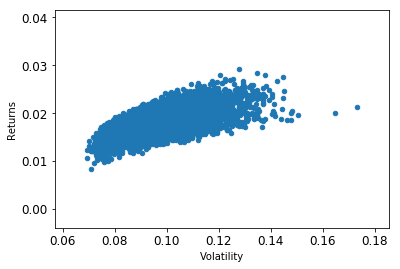

In [6]:
path='project_7_csv/stock_data3.csv'

# 1. Load the stock data
stock_data = pd.read_csv(path)
selected = list(stock_data.columns[1:])
print(stock_data[selected].pct_change().mean())
print(stock_data[selected].pct_change().cov())

#stock_names = ['PFE', 'TGT', 'M', 'VZ', 'JPM', 'MRO', 'KO', 'PG', 'CVS', 'HPQ']
selected = ['TGT', 'M', 'VZ', 'JPM', 'CVS']

# 2. Find the quarterly for each period
returns_quarterly = stock_data[selected].pct_change()

# 3. Find the expected returns 
expected_returns = returns_quarterly.mean()

# 4. Find the covariance 
cov_quarterly = returns_quarterly.cov()

# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

# 6. Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# 7. Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

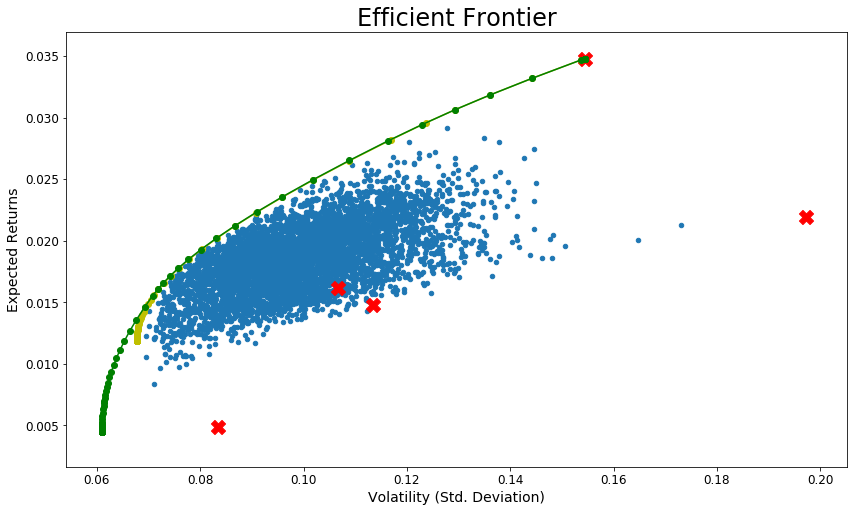

In [7]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(14,8))
# 8. Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

# 9. Compare the set of portfolios on the EF to the 
single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)

# All 10
all_ten_EF = pd.read_csv('project_7_csv/all_ten.csv')
plt.plot(all_ten_EF['Risks'], all_ten_EF['Returns'], 'g-o')
plt.show()